In [8]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
experiment_dir = './'

In [9]:
def collect_experiment_dicts(target_dir, test_flag=False):
    experiment_dicts = dict()
    for subdir, dir, files in os.walk(target_dir):
#         print(subdir)
        for file in files:
            print(file)
            filepath = None
            if not test_flag:
                if file == 'summary.csv':
                    filepath = os.path.join(subdir, file)
            
            elif test_flag:
                if file == 'test_summary.csv':
                    filepath = os.path.join(subdir, file)
            
            if filepath is not None:
                
                with open(filepath, 'r') as read_file:
                    lines = read_file.readlines()
                    
                current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}
                
                for line in lines[1:]:
                    for idx, value in enumerate(line.replace('\n', '').split(',')):
                        current_experiment_dict[idx_to_key[idx]].append(float(value))
                
                experiment_dicts[subdir.split('/')[-2]] = current_experiment_dict
                
    return experiment_dicts
                
            

In [10]:
result_dict = collect_experiment_dicts(target_dir=experiment_dir)
# for key, value in result_dict.items():
#     print(key, list(value.keys()))

01_Introduction.ipynb
Coursework_2_Pytorch_Introduction.ipynb
Plot_Results.ipynb
Plot_Results_cs.ipynb
01_Introduction-checkpoint.ipynb
Coursework_2_Pytorch_Introduction-checkpoint.ipynb
Plot_Results-checkpoint.ipynb
Plot_Results_cs-checkpoint.ipynb
code_scheme.svg
fprop-bprop-block-diagram.pdf
fprop-bprop-block-diagram.png
fprop-bprop-block-diagram.tex
jupyter-dashboard.png
jupyter-notebook-interface.png
singleLayerNetBP-1.png
singleLayerNetPredict.png
singleLayerNetWts-1.png
singleLayerNetWtsBP.pdf
singleLayerNetWtsEqns-1.png
singleLayerNetWtsEqns.pdf
summary.csv
test_summary.csv


In [14]:
print(result_dict)


{'.': {'train_acc': [0.045852632, 0.088631579, 0.149536842, 0.205747368, 0.264294737, 0.316947368, 0.352526316, 0.3828, 0.408863158, 0.431726316, 0.446126316, 0.464168421, 0.480610526, 0.494421053, 0.506821053, 0.519852632, 0.532, 0.542042105, 0.550863158, 0.558168421, 0.566652632, 0.574926316, 0.582947368, 0.587557895, 0.596168421, 0.600778947, 0.607915789, 0.612589474, 0.621621053, 0.625831579, 0.633284211, 0.637305263, 0.644042105, 0.649284211, 0.653557895, 0.656378947, 0.661957895, 0.665347368, 0.669305263, 0.672505263, 0.682821053, 0.685557895, 0.688926316, 0.696821053, 0.697578947, 0.700126316, 0.705094737, 0.707263158, 0.711178947, 0.716421053, 0.7196, 0.721894737, 0.726842105, 0.730442105, 0.737136842, 0.738505263, 0.740547368, 0.743073684, 0.748168421, 0.755347368, 0.752989474, 0.758652632, 0.759557895, 0.765305263, 0.769389474, 0.773810526, 0.777578947, 0.776252632, 0.780610526, 0.784042105, 0.785263158, 0.788547368, 0.791473684, 0.795936842, 0.797578947, 0.8, 0.800421053, 0.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_loss', 'val_loss']:
            item = stats[name][k]
            ax_1.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format("VGG38_BN_RC_lr_1e-2", k))
            
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Loss')
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_acc', 'val_acc']:
            item = stats[name][k]
            ax_2.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format("VGG38_BN_RC_lr_1e-2", k))
            
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Accuracy')
    ax_2.set_xlabel('Epoch number')
    
    fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    

C:\Users\jacks\AppData\Local\Temp\ipykernel_22252\3555175198.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
C:\Users\jacks\AppData\Local\Temp\ipykernel_22252\3555175198.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error in 3.6
  fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
C:\Users\jacks\AppData\Local\Temp\ipykernel_22252\3555175198.py:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
C:

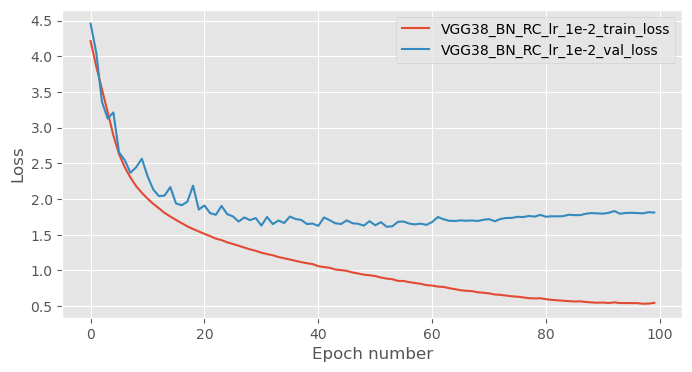

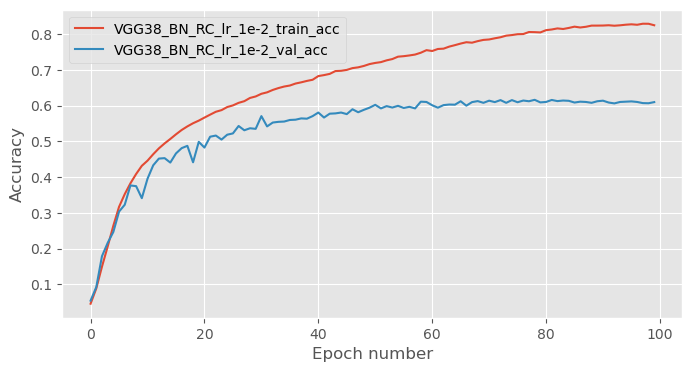

In [21]:
plot_result_graphs('problem_model', result_dict, keys_to_plot=['.'])

In [ ]:
plot_result_graphs('problem_model', result_dict, keys_to_plot=['MLP_cw2'])